In [2]:
import cv2
import numpy as np
import random 
from matplotlib import pyplot as plt
from brisque import BRISQUE

In [3]:
def imshow(title='Image', image = None,size =5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
def score(image):
    obj = BRISQUE(url = False)
    return obj.score(image)

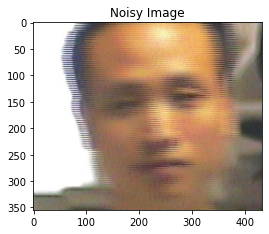

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [105 131 125]
  [106 129 121]
  [105 122 111]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [110 132 127]
  [107 127 122]
  [105 122 113]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [117 131 129]
  [111 125 123]
  [107 121 119]]

 ...

 [[123 135 141]
  [122 134 140]
  [119 131 137]
  ...
  [ 55  71  77]
  [ 51  67  73]
  [ 50  66  72]]

 [[123 133 140]
  [122 132 139]
  [118 130 136]
  ...
  [ 57  73  79]
  [ 53  69  75]
  [ 50  67  70]]

 [[121 131 138]
  [120 130 137]
  [117 129 135]
  ...
  [ 58  74  80]
  [ 55  71  77]
  [ 50  67  70]]]
Image score of the following image is 13.804579130992096


In [36]:
noisy_image = cv2.imread("C:\\Users\\baksh\\Desktop\\major_project\\The-image-captured-by-CCTV-camera-with-interlace-problem.jpg")
imshow('Noisy Image', noisy_image)
print(noisy_image)
print("Image score of the following image is", score(noisy_image))

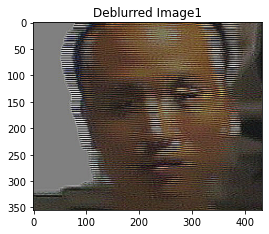

Image score of the following image is 100.90680870511659


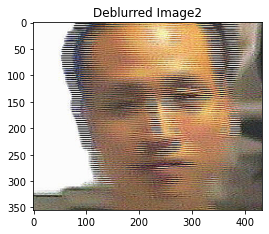

Image score of the following image is 91.73972089464809


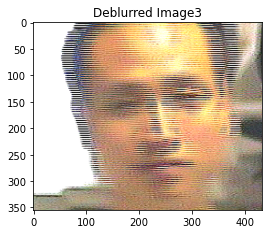

Image score of the following image is 84.36917669737977


In [37]:
# applying the deblurring filter 
image_gray = noisy_image
kernel1 = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]], np.float32)
kernel2 = np.array([[-1,-1,-1],[-1,8.99,-1],[-1,-1,-1]], np.float32)
kernel3 = np.array([[-1,-1,-1],[-1,9.3,-1],[-1,-1,-1]], np.float32)
image_filtered1 = cv2.filter2D(image_gray,-1, kernel1)
image_filtered2 = cv2.filter2D(image_gray,-1, kernel2)
image_filtered3 = cv2.filter2D(image_gray,-1, kernel3)
imshow('Deblurred Image1', image_filtered1)
print("Image score of the following image is", score(image_filtered1))
imshow('Deblurred Image2', image_filtered2)
print("Image score of the following image is", score(image_filtered2))
imshow('Deblurred Image3', image_filtered3)
print("Image score of the following image is", score(image_filtered3))

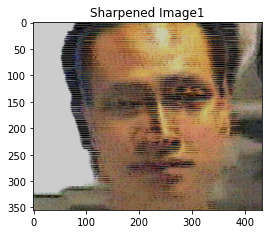

Image score of the following image is 20.733650355391745


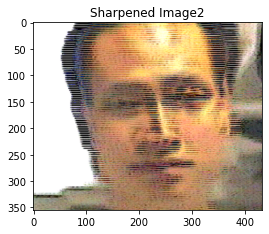

Image score of the following image is 33.02887574200028


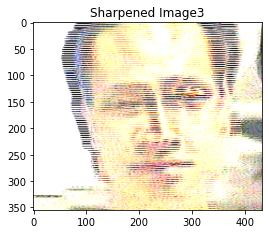

Image score of the following image is 42.56418589161021


In [38]:
blur= cv2.GaussianBlur(image_filtered3,(3,3),0)
image_sharp = cv2.subtract(image_filtered3, blur)
image_sharp1  = cv2.addWeighted(image_filtered3,0.8, image_sharp,-2,0)
image_sharp2  = cv2.addWeighted(image_filtered3,1, image_sharp,-2,0)
image_sharp3  = cv2.addWeighted(image_filtered3,1.9, image_sharp,-2,0)
#image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image1", image_sharp1)
print("Image score of the following image is", score(image_sharp1))
imshow("Sharpened Image2", image_sharp2)
print("Image score of the following image is", score(image_sharp2))
imshow("Sharpened Image3", image_sharp3)
print("Image score of the following image is", score(image_sharp3))

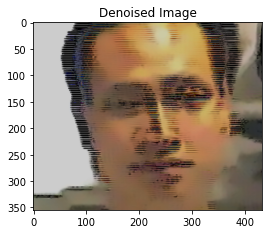

Image score of the following image is -8.023450263441106


In [48]:
dst = cv2.fastNlMeansDenoisingColored(image_sharp1, None,9,6,10,21)
imshow("Denoised Image",dst)
print("Image score of the following image is", score(dst))

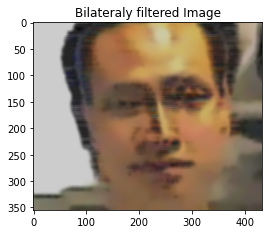

Image score of the following image is 71.57321267425979


In [49]:
image_bfiltered = cv2.bilateralFilter(dst, d=9, sigmaColor = 11000, sigmaSpace = 2000)
imshow('Bilateraly filtered Image', image_bfiltered)
print("Image score of the following image is", score(image_bfiltered))

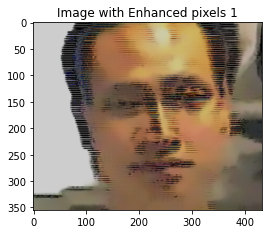

Image score of the following image is -8.020672577662623


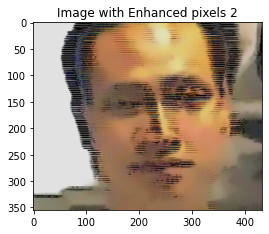

Image score of the following image is -8.938634173577867


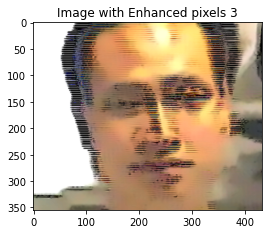

Image score of the following image is -10.261728820871923


In [54]:
alpha1,alpha2,alpha3 = 1.0,1.1,1.3
beta1,beta2,beta3 = 1,1,2
image_enhanced1 = cv2.convertScaleAbs(dst, alpha = alpha1 , beta = beta1 )
image_enhanced2 = cv2.convertScaleAbs(dst, alpha = alpha2 , beta = beta2 )
image_enhanced3 = cv2.convertScaleAbs(dst, alpha = alpha3 , beta = beta3 )
imshow('Image with Enhanced pixels 1', image_enhanced1)
print("Image score of the following image is", score(image_enhanced1))
imshow('Image with Enhanced pixels 2', image_enhanced2)
print("Image score of the following image is", score(image_enhanced2))
imshow('Image with Enhanced pixels 3', image_enhanced3)
print("Image score of the following image is", score(image_enhanced3))

C:\Users\baksh\AppData\Local\Temp\ipykernel_18912\1071236655.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_18912\1071236655.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


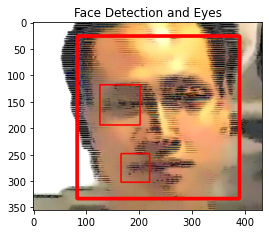

In [55]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(image_enhanced,cv2.COLOR_BGR2GRAY)
image_to_detect = image_enhanced3

face = face_classifier.detectMultiScale(image_to_detect,1.3,minNeighbors=5,minSize =(5,5)) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_to_detect, 'Face', (x-w, y-h),font,0.5, (0,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_to_detect, (x,y), (x+w,y+h),(0,0,255),5)
    roi_gray= image_to_detect[y:y+h,x:x+w]
    roi_color=image_to_detect[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_to_detect)